In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import re
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [4]:
airbnb_df = pd.read_csv("AB_NYC_2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
print(airbnb_df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [6]:
#Cleaning Step I - Dropping duplicates
airbnb_df.drop_duplicates(inplace=True)

In [7]:
#Finding the count of missing values
missing_values = airbnb_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
# Cleaning Step II - Handling missing values (a) Fillig missing values in the 'name' column with placeholder string so no missing values remain and to identify 
airbnb_df['name'].fillna('No Name Provided', inplace=True)
airbnb_df['host_name'].fillna('Unknown Host', inplace=True)

In [9]:
# Cleaning Step II - Handling missing values (b) Forward filling missing values in the 'last_review' column, so missing entries will be filled with the most recent review date since there are 10000+ missing rows and convert it into date-time instead of object
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(method='ffill') 
# Filling missing values in the 'reviews_per_month' column with 0, as it has not received any reviews
airbnb_df['reviews_per_month'].fillna(0, inplace=True) 

In [10]:
#Checking if the cleaning worked
missing_values = airbnb_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [11]:
# Cleaning Step III - Standardize string columns
string_columns = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

for column in string_columns:
    # Strip whitespace from both ends
    airbnb_df[column] = airbnb_df[column].str.strip()
    # Convert to title case
    airbnb_df[column] = airbnb_df[column].str.title() 


airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,2019-05-21,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
#Some more text preprocessing, removing uncessary puntuations or characters from name column
def clean_text(string_value):

    text = string_value
    text = re.sub(r'[!+*.#]',' ', text)
    text = re.sub(r'\s{2,}',' ', text)

    #removing the trailing space
    text = text.strip()
   
    return text

airbnb_df['name'] = airbnb_df['name'].apply(clean_text)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem New York,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,2019-05-21,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
#Cleaning Step IV - Handling outliers by not removing them, but by setting them to lower bound and upper bound using clip which comes under capping outliers. 
Q1 = airbnb_df['price'].quantile(0.25)
Q3 = airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airbnb_df['price'] = airbnb_df['price'].clip(lower=lower_bound, upper=upper_bound)
print(airbnb_df['price'].describe())

count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64


In [14]:
#Cleaning Step V - Since data includes geographical coordinates (latitude and longitude), ensure they fall within valid ranges


airbnb_df = airbnb_df[(airbnb_df['latitude'] > 40.4774) & (airbnb_df['latitude'] < 40.9176) & (airbnb_df['longitude'] > -74.2591) & (airbnb_df['longitude'] < -73.7004)]

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,The Village Of Harlem New York,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150.0,3,0,2019-05-21,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80.0,10,9,2018-11-19,0.10,1,0


In [15]:
#cleaning step VI, correcting common typos for the new york city boroughs, for analysis later

# Define a mapping for common typos and corrections
neighbourhood_corrections = {
    'Manhatten': 'Manhattan',
    'Brookln': 'Brooklyn',
    'Quuens': 'Queens',
    'Bronx': 'Bronx',  # Ensuring consistency, no typo here but included for completeness
    'StatenIsland': 'Staten Island'
}

# Apply the corrections to the 'neighbourhood_group' column
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].replace(neighbourhood_corrections)

# Verify the changes
print("Corrected 'neighbourhood_group' column values:")
print(airbnb_df['neighbourhood_group'].value_counts())

Corrected 'neighbourhood_group' column values:
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [16]:
# cleaning step VII extract year and month from last_review column and add to new column to make analysis easier
# Extract the year from 'last_review'
airbnb_df['last_review_year'] = airbnb_df['last_review'].dt.year

# Extract the month from 'last_review'
airbnb_df['last_review_month'] = airbnb_df['last_review'].dt.month

# Verify the new columns
print(airbnb_df[['last_review', 'last_review_year', 'last_review_month']].head())


  last_review  last_review_year  last_review_month
0  2018-10-19              2018                 10
1  2019-05-21              2019                  5
2  2019-05-21              2019                  5
3  2019-07-05              2019                  7
4  2018-11-19              2018                 11


In [17]:
#cleaning step VIII, using feature encoding from the skit-learn library.
# can be used in EDA while plotting graphical representations

feature_encoding = OrdinalEncoder()
airbnb_df["room_type_code"] = feature_encoding.fit_transform(airbnb_df[["room_type"]])

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,room_type_code
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149.0,1,9,2018-10-19,0.21,6,365,2018,10,1.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225.0,1,45,2019-05-21,0.38,2,355,2019,5,0.0
2,3647,The Village Of Harlem New York,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150.0,3,0,2019-05-21,0.00,1,365,2019,5,1.0
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89.0,1,270,2019-07-05,4.64,1,194,2019,7,0.0
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80.0,10,9,2018-11-19,0.10,1,0,2018,11,0.0


In [18]:
#cleaning step IX, aggregtion of columns price and minimum nights to get total price for the minimum nights, can be used during plotting of graphs
#also creating bins for the total price column to plot graphs

#total price = price * minimum_nights
airbnb_df['Total_Price'] = airbnb_df['price'] * airbnb_df['minimum_nights']

#setting the bins number as 30 for now. Can be upated based on plots for better info
airbnb_df['Total_Price_Bins'] = pd.qcut(airbnb_df['Total_Price'], 30)

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,room_type_code,Total_Price,Total_Price_Bins
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149.0,...,9,2018-10-19,0.21,6,365,2018,10,1.0,149.0,"(145.0, 160.0]"
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225.0,...,45,2019-05-21,0.38,2,355,2019,5,0.0,225.0,"(220.0, 250.0]"
2,3647,The Village Of Harlem New York,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150.0,...,0,2019-05-21,0.00,1,365,2019,5,1.0,450.0,"(400.0, 450.0]"
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89.0,...,270,2019-07-05,4.64,1,194,2019,7,0.0,89.0,"(85.0, 100.0]"
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80.0,...,9,2018-11-19,0.10,1,0,2018,11,0.0,800.0,"(747.0, 900.0]"


In [19]:
#cleaning step X, normalizing the non-categorical data
#creating a copy of the dataframe to normalize the data without affecting orginial dataframe
normalized_airbnb_df =  airbnb_df.copy()

columns = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365','Total_Price' ]

for col in columns:
  min_value = normalized_airbnb_df[col].min()
  max_value = normalized_airbnb_df[col].max()

  normalized_airbnb_df[col] = (normalized_airbnb_df[col] - min_value) / (max_value - min_value)

normalized_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,room_type_code,Total_Price,Total_Price_Bins
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,0.446108,...,0.014308,2018-10-19,0.003590,0.015337,1.000000,2018,10,1.0,0.000446,"(145.0, 160.0]"
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,0.673653,...,0.071542,2019-05-21,0.006496,0.003067,0.972603,2019,5,0.0,0.000674,"(220.0, 250.0]"
2,3647,The Village Of Harlem New York,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,0.449102,...,0.000000,2019-05-21,0.000000,0.000000,1.000000,2019,5,1.0,0.001347,"(400.0, 450.0]"
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,0.266467,...,0.429253,2019-07-05,0.079316,0.000000,0.531507,2019,7,0.0,0.000266,"(85.0, 100.0]"
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,0.239521,...,0.014308,2018-11-19,0.001709,0.000000,0.000000,2018,11,0.0,0.002395,"(747.0, 900.0]"


In [20]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  float64       
 10  minimum_nights                  48895 non-null  int64         
 11  nu

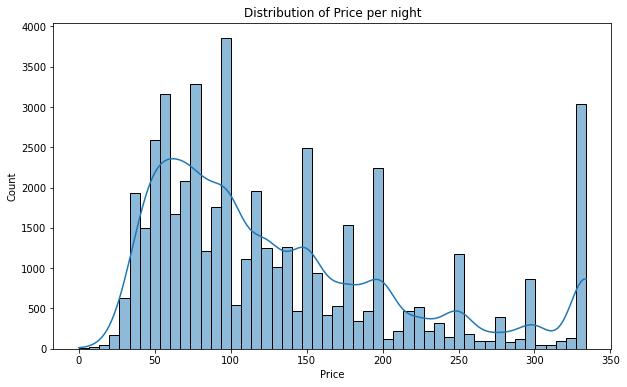

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['price'], bins=50, kde=True)
plt.title('Distribution of Price per night')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

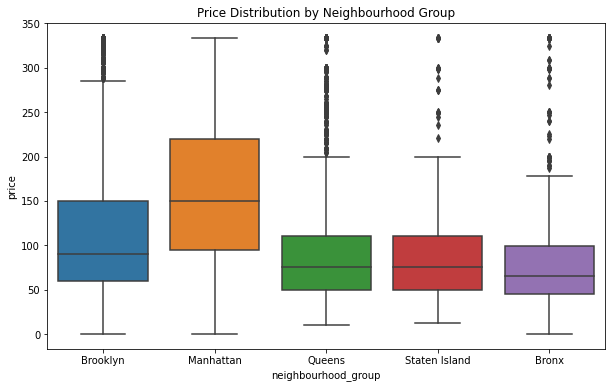

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=airbnb_df)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

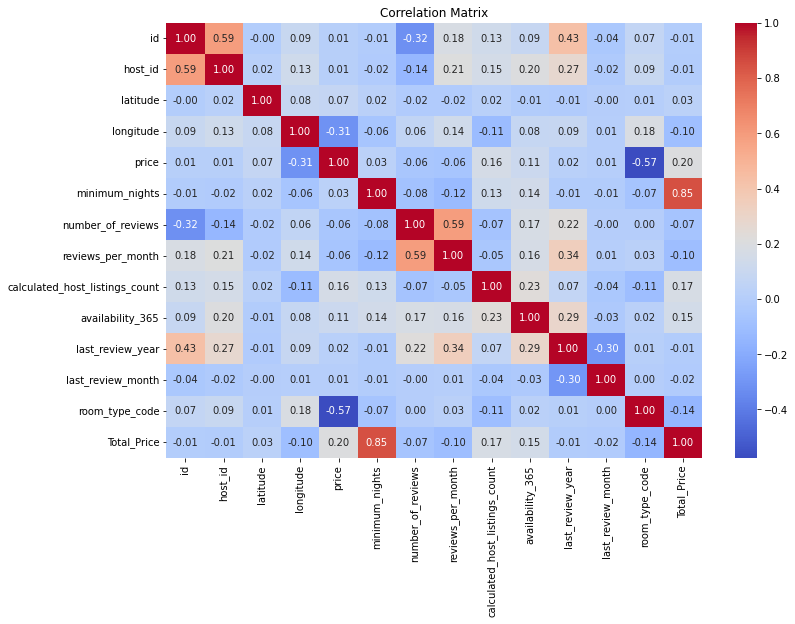

Features with low correlation with price below 0.07: ['minimum_nights', 'last_review_year', 'host_id', 'id', 'last_review_month', 'number_of_reviews', 'reviews_per_month'], so dropping those rows in the corelated dataset.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   host_name                       48895 non-null  object        
 2   neighbourhood_group             48895 non-null  object        
 3   neighbourhood                   48895 non-null  object        
 4   latitude                        48895 non-null  float64       
 5   longitude                       48895 non-null  float64       
 6   room_type                       48895 non-null  object        
 7   price                           48895 non-null  floa

In [23]:
correlation_matrix = airbnb_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
corelation_with_target = correlation_matrix['price'].sort_values(ascending=False)
threshold = 0.07
low_corr_features = corelation_with_target[abs(corelation_with_target) < threshold].index
print(f"Features with low correlation with price below {threshold}: {list(low_corr_features)}, so dropping those rows in the corelated dataset.")
price_corelated_airbnb_df = airbnb_df.drop(columns=low_corr_features)
print(price_corelated_airbnb_df.info())

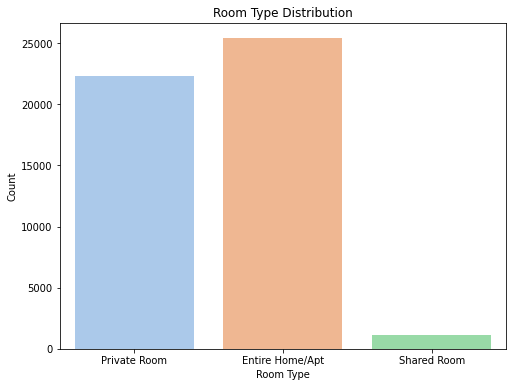

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=airbnb_df, palette='pastel')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

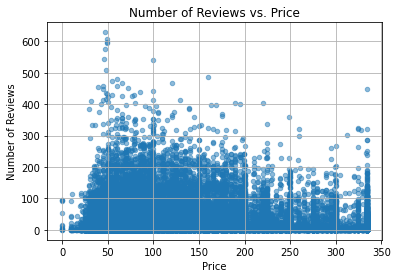

In [25]:
airbnb_df.plot(kind='scatter', x='price', y='number_of_reviews', alpha=0.5)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


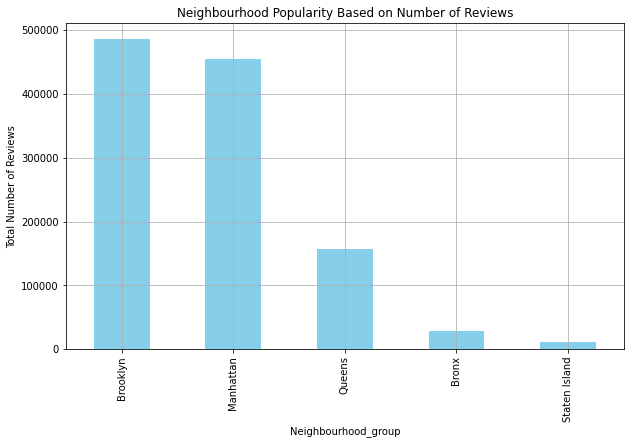

In [26]:
neighbourhood_popularity = airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
neighbourhood_popularity.plot(kind='bar', color='skyblue')
plt.title('Neighbourhood Popularity Based on Number of Reviews')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


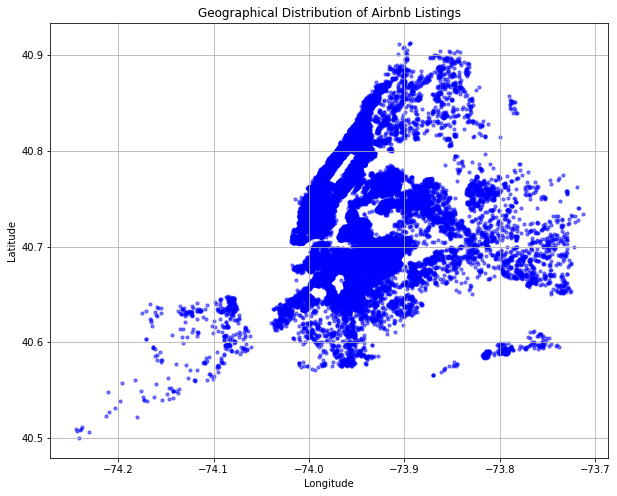

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(airbnb_df['longitude'], airbnb_df['latitude'], c='blue', alpha=0.5, s=10)
plt.title('Geographical Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

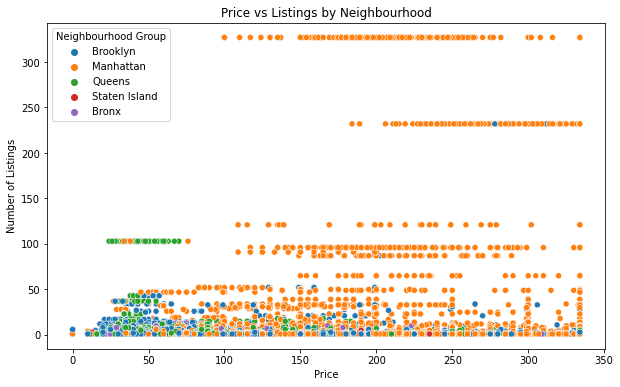

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=airbnb_df,x='price',y='calculated_host_listings_count',hue='neighbourhood_group')
plt.title("Price vs Listings by Neighbourhood")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.legend(title="Neighbourhood Group")
plt.show()

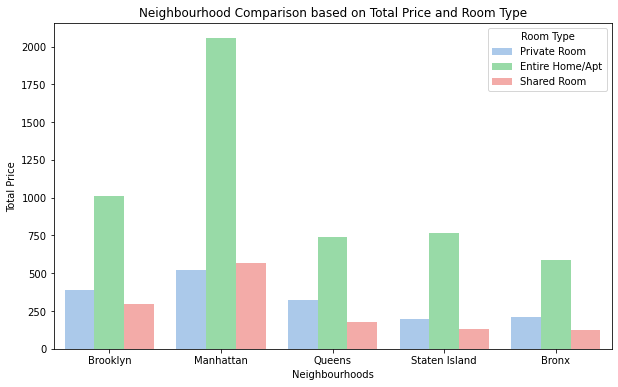

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=airbnb_df,x='neighbourhood_group',y='Total_Price',hue='room_type',palette='pastel6',ci=None)
plt.title("Neighbourhood Comparison based on Total Price and Room Type")
plt.xlabel("Neighbourhoods")
plt.ylabel("Total Price")
plt.legend(title="Room Type")
plt.show()

array([[<AxesSubplot:title={'center':'Entire Home/Apt'}>,
        <AxesSubplot:title={'center':'Private Room'}>],
       [<AxesSubplot:title={'center':'Shared Room'}>, <AxesSubplot:>]],
      dtype=object)

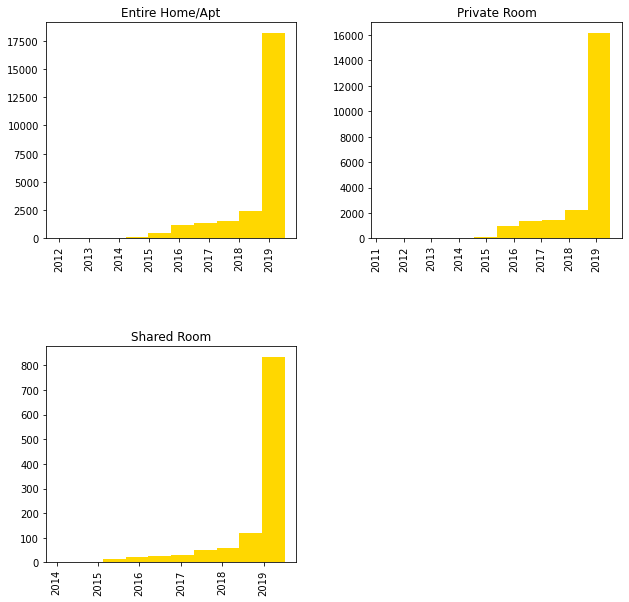

In [30]:
airbnb_df.hist(column='last_review',by='room_type',figsize=(10,10),color='gold')

             id                                               name  cluster
0          2539                 Clean & Quiet Apt Home By The Park        2
1          2595                              Skylit Midtown Castle        0
2          3647                     The Village Of Harlem New York        1
3          3831                    Cozy Entire Floor Of Brownstone        2
4          5022   Entire Apt: Spacious Studio/Loft By Central Park        1
...         ...                                                ...      ...
48890  36484665    Charming One Bedroom - Newly Renovated Rowhouse        2
48891  36485057      Affordable Room In Bushwick/East Williamsburg        2
48892  36485431            Sunny Studio At Historical Neighborhood        1
48893  36485609                43Rd St Time Square-Cozy Single Bed        2
48894  36487245  Trendy Duplex In The Very Heart Of Hell'S Kitchen        2

[48895 rows x 3 columns]


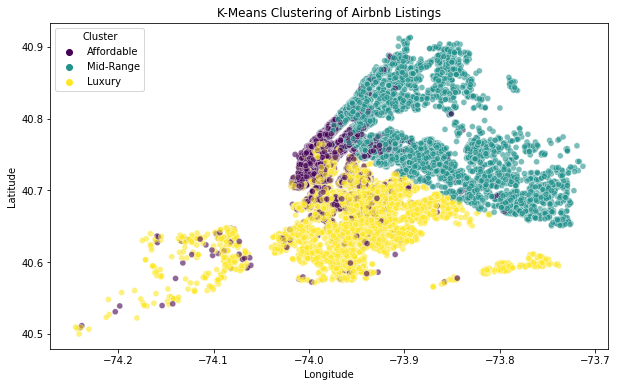

In [31]:
features = airbnb_df[['latitude', 'longitude', 'price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(scaled_features)
airbnb_df['cluster'] = kmeans.labels_
cluster_names = { 0: 'Affordable', 1: 'Mid-Range', 2: 'Luxury'}
cluster_assignments = airbnb_df[['id', 'name', 'cluster']]
print(cluster_assignments)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=airbnb_df, x='longitude', y='latitude', hue='cluster', palette='viridis', alpha=0.6)
handles, labels = scatter.get_legend_handles_labels()
new_labels = [cluster_names[int(label)] for label in labels]
plt.legend(handles, new_labels, title='Cluster')
plt.title('K-Means Clustering of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Accuracy: 0.81
                 precision    recall  f1-score   support

Entire Home/Apt       0.81      0.88      0.84      5029
   Private Room       0.81      0.78      0.79      4509
    Shared Room       0.90      0.08      0.15       241

       accuracy                           0.81      9779
      macro avg       0.84      0.58      0.59      9779
   weighted avg       0.81      0.81      0.80      9779



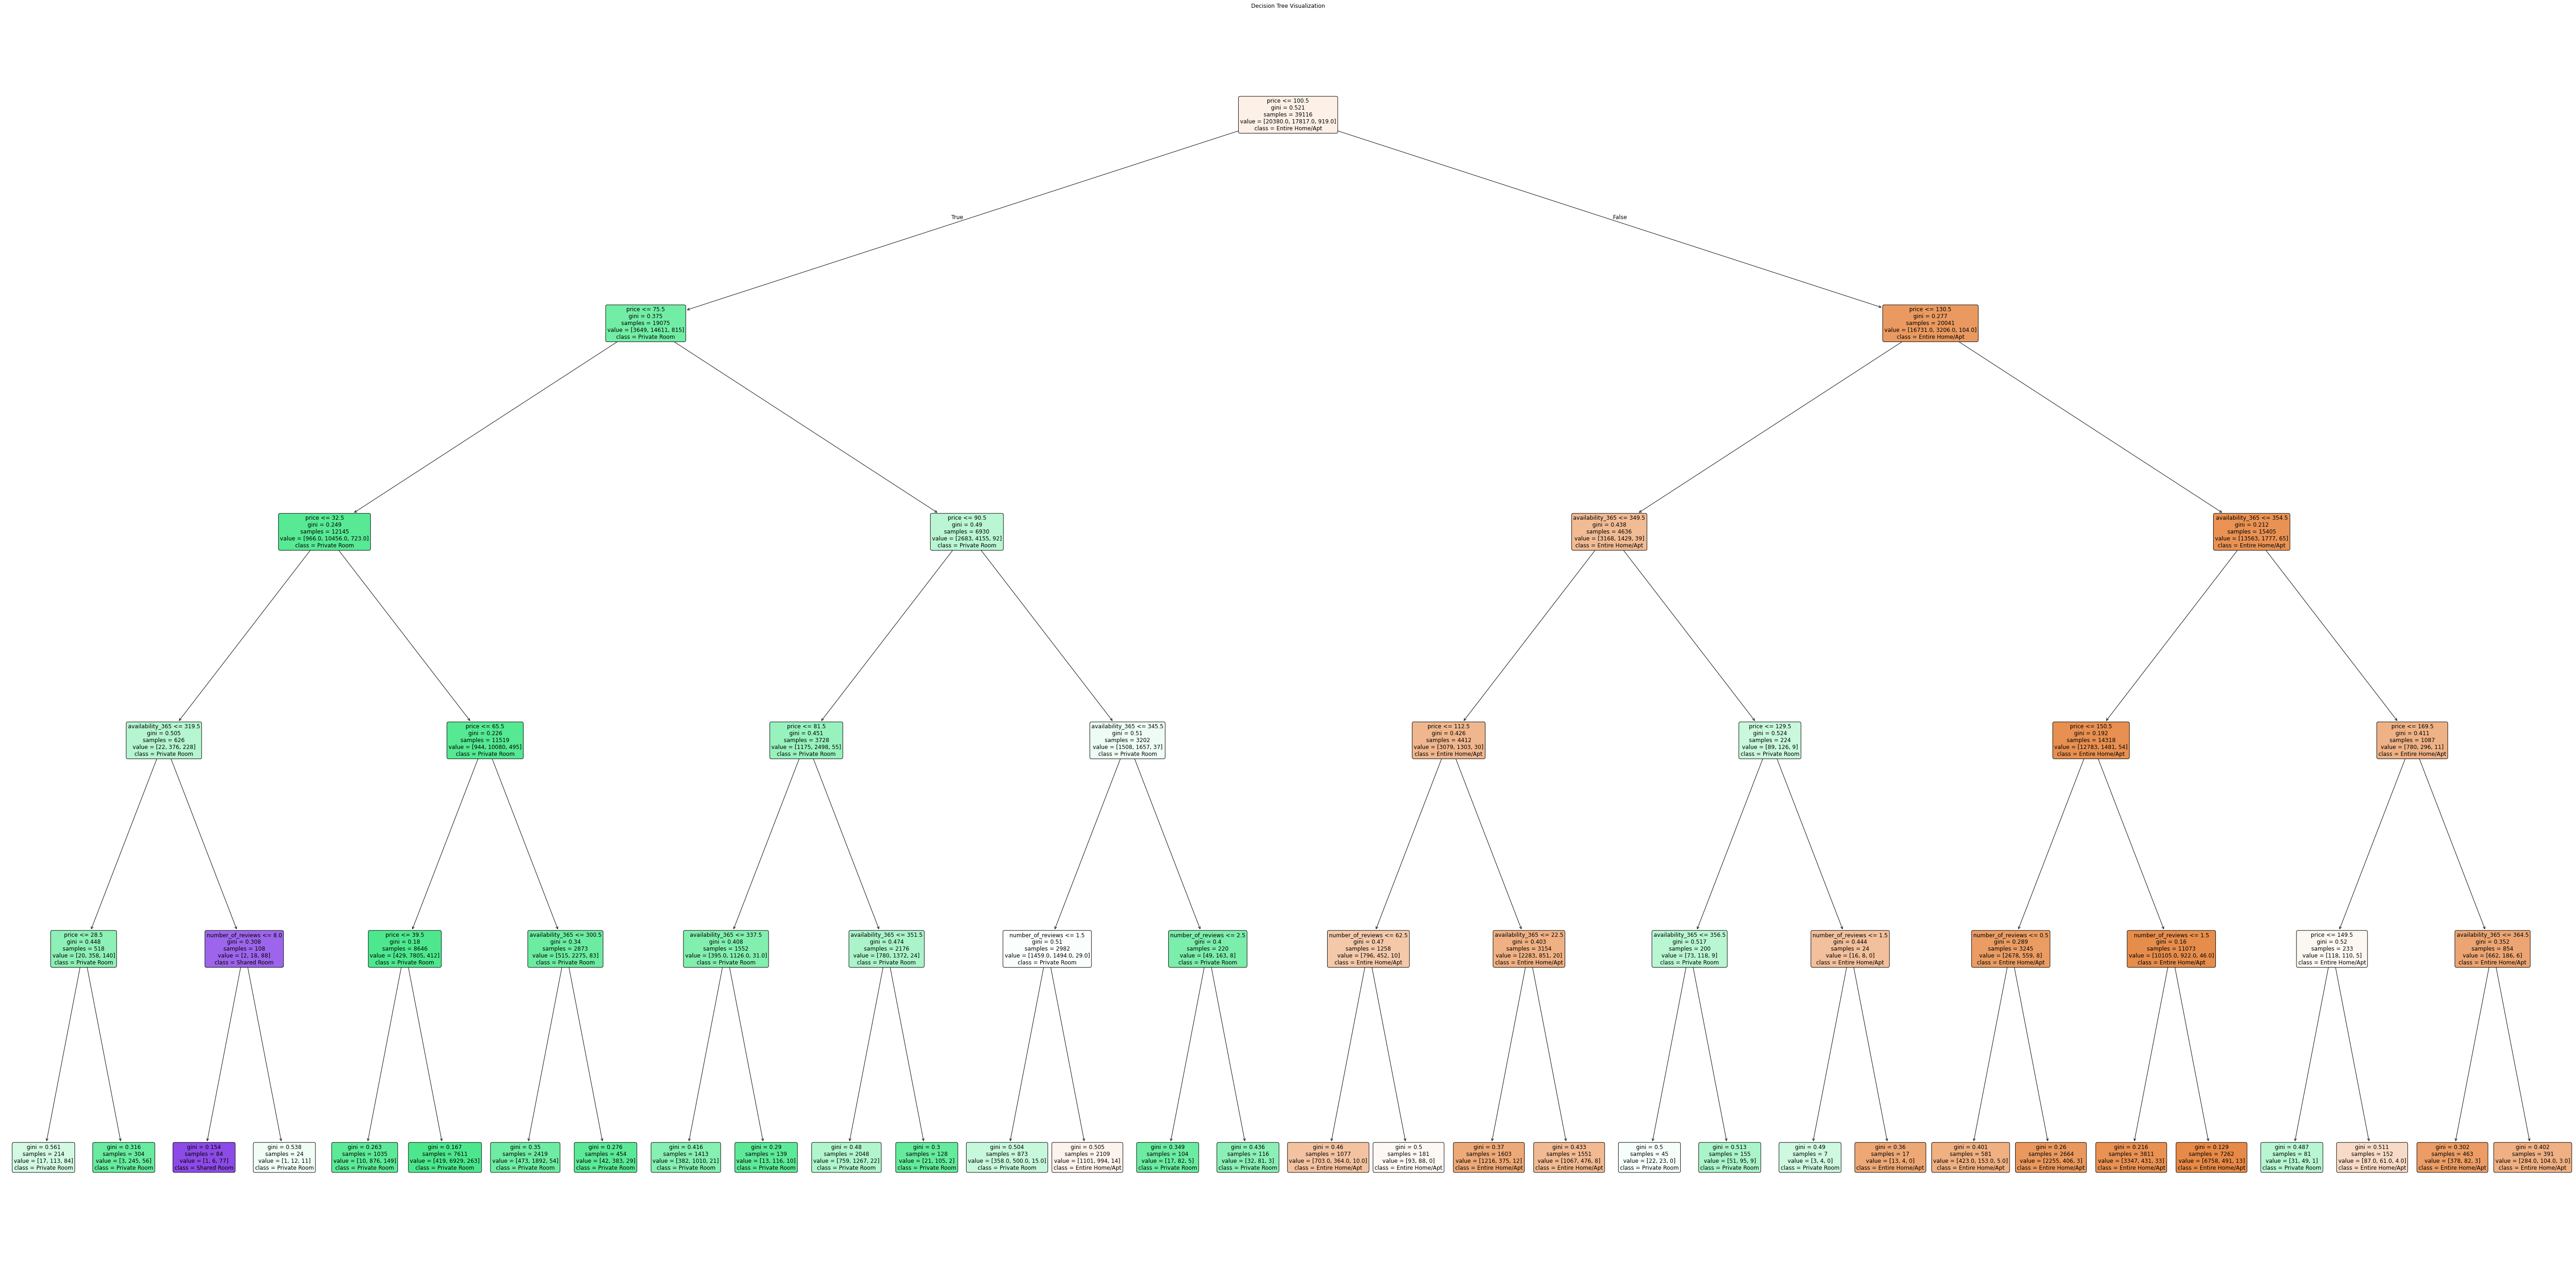

In [32]:
X = airbnb_df[['price', 'number_of_reviews', 'availability_365']]
y = airbnb_df['room_type']
y_encoded = pd.get_dummies(y).idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
plt.figure(figsize=(100, 50))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

SVM Accuracy: 0.52
                 precision    recall  f1-score   support

Entire Home/Apt       0.67      0.58      0.62      5082
   Private Room       0.59      0.45      0.51      4465
    Shared Room       0.05      0.41      0.09       232

       accuracy                           0.52      9779
      macro avg       0.43      0.48      0.41      9779
   weighted avg       0.62      0.52      0.56      9779



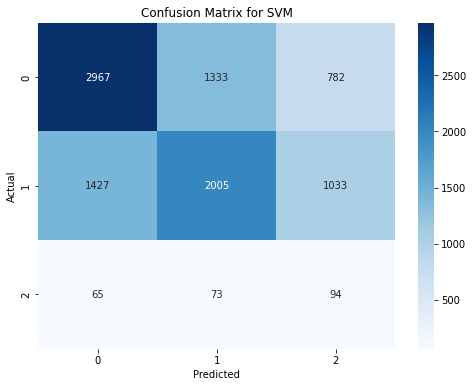

In [33]:
X_svm = airbnb_df[['latitude', 'longitude', 'reviews_per_month']]
y_svm = airbnb_df['room_type']

y_encoded_svm = pd.get_dummies(y_svm).idxmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_encoded_svm, test_size=0.2, random_state=42, stratify=y_encoded_svm)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_svm, zero_division=0))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost Classifier Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5082
           1       0.61      0.61      0.61      4465
           2       0.62      0.11      0.19       232

    accuracy                           0.64      9779
   macro avg       0.63      0.47      0.49      9779
weighted avg       0.64      0.64      0.63      9779



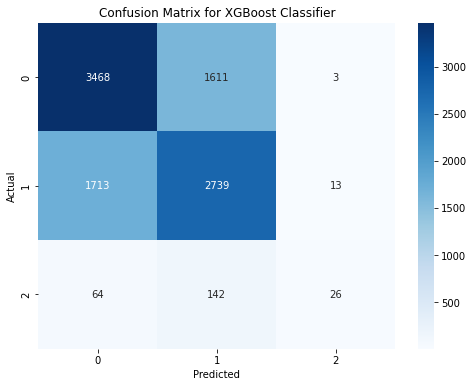

In [34]:
encoder = OrdinalEncoder()
airbnb_df[['neighbourhood_group']] = encoder.fit_transform(airbnb_df[['neighbourhood_group']])

X_xgb = airbnb_df[['neighbourhood_group', 'calculated_host_listings_count', 'availability_365']]
y_xgb = airbnb_df['room_type']

label_encoder = LabelEncoder()
y_encoded_xgb = label_encoder.fit_transform(y_xgb)

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_encoded_xgb, test_size=0.2, random_state=42, stratify=y_encoded_xgb)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_xgb, zero_division=0))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# two categories based on price ( using median as threshold) and categorizing as 0 and 1
# 0 = low and 1 = high 
median_price = airbnb_df['price'].median()
airbnb_df['price_group'] = airbnb_df['price'].apply(lambda x: 1 if x > median_price else 0)

# print(airbnb_df)
#using the features from above based on the price vs listings by neighbourhoods.
X_nb = airbnb_df[['calculated_host_listings_count', 'neighbourhood_group']]
y_nb = airbnb_df['price_group']

X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

# Use Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.98      0.68      4941
           1       0.77      0.07      0.13      4838

    accuracy                           0.53      9779
   macro avg       0.64      0.52      0.40      9779
weighted avg       0.64      0.53      0.41      9779



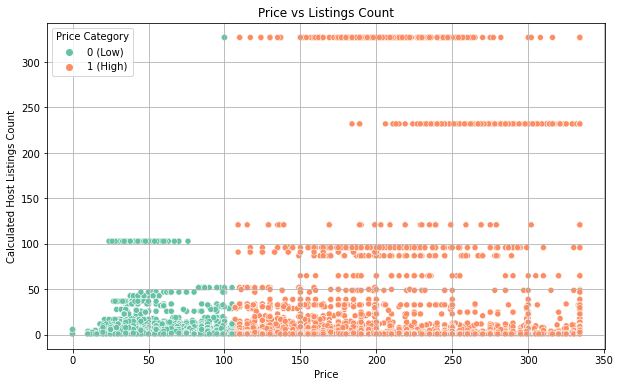

In [36]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='price', y='calculated_host_listings_count', hue='price_group', data=airbnb_df, palette='Set2')
plt.title('Price vs Listings Count')
plt.ylabel('Calculated Host Listings Count')
plt.xlabel('Price')
handles, labels = plot.get_legend_handles_labels()
new_labels = ['0 (Low)', '1 (High)']
plt.legend(handles, new_labels,title="Price Category")
plt.grid()
plt.show()


Losgistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4750
           1       0.85      0.77      0.81      5029

    accuracy                           0.81      9779
   macro avg       0.81      0.81      0.81      9779
weighted avg       0.82      0.81      0.81      9779



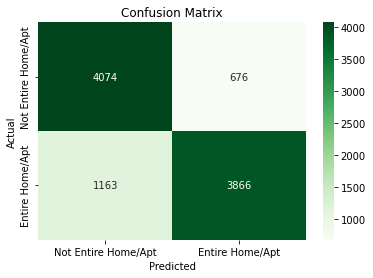

In [37]:
# X =airbnb_df[['neighbourhood_group', 'room_type_code']]
# y = airbnb_df['price_category']

# predict "Entire Home/Apt" (1) vs others (0)
airbnb_df['room_binary'] = airbnb_df['room_type_code'].apply(lambda x: 1 if x == 0 else 0)

X_lr = airbnb_df[['neighbourhood_group','price']]
y_lr = airbnb_df['room_binary']

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Logistic regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Losgistic Regression Accuracy: {accuracy_lr:.2f}')

print(classification_report(y_test, y_pred_lr))

matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Entire Home/Apt', 'Entire Home/Apt'], yticklabels=['Not Entire Home/Apt', 'Entire Home/Apt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


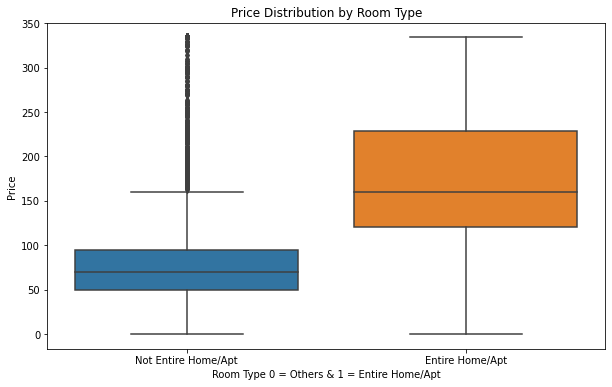

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_binary', y='price', data=airbnb_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type 0 = Others & 1 = Entire Home/Apt')
plt.ylabel('Price')
plt.xticks([0, 1], ['Not Entire Home/Apt', 'Entire Home/Apt'])
plt.show()

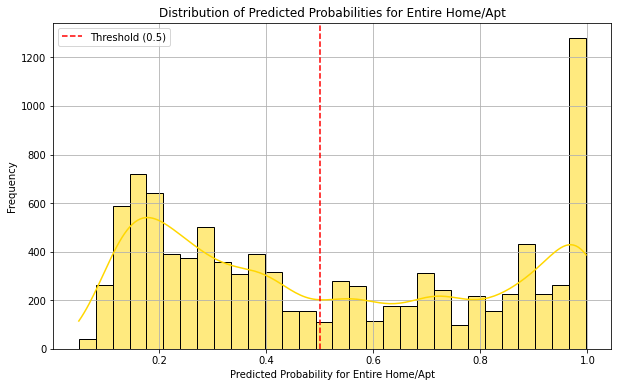

In [39]:
#checking the distribution based on price for the Entire Home/Apt
y_prob = model_lr.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_prob, bins=30, kde=True, color='gold')
plt.title('Distribution of Predicted Probabilities for Entire Home/Apt')
plt.xlabel('Predicted Probability for Entire Home/Apt')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid()
plt.show()